In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy

# 25% percentile filtering

In [77]:
train = pd.read_json("./obb_annotations_stratified_split/annos_with_areas/all_annotations/obb_train_split_anno_with_areas.json")
val = pd.read_json("./obb_annotations_stratified_split/annos_with_areas/all_annotations/obb_val_split_anno_with_areas.json")
test = pd.read_json("./obb_annotations_stratified_split/annos_with_areas/all_annotations/obb_test_split_anno_with_areas.json")

In [31]:
combined = []
lengths = []
widths = []

for dataframe in (train, val, test):
    for index, row in dataframe.iterrows():
        if row["box"] is not None:
            combined.append(row["box"]["contour_area"])
            length, width = max(row["box"]["size"]), min(row["box"]["size"])
            lengths.append(length)
            widths.append(width)

In [76]:
len(combined)

3216

In [47]:
print(np.quantile(combined, 0.05))
print(np.quantile(combined, 0.10))
print(np.quantile(combined, 0.15))
print(np.quantile(combined, 0.20))
print(np.quantile(combined, 0.25))
print(np.quantile(combined, 0.5))
print(np.quantile(combined, 0.6))
print(np.quantile(combined, 0.65))
print(np.quantile(combined, 0.75))

83.375
235.75
362.75
486.5
624.5
1397.5
1874.5
2180.0
3093.25


(array([1.023e+03, 7.490e+02, 4.050e+02, 2.570e+02, 1.800e+02, 1.290e+02,
        1.010e+02, 7.400e+01, 6.700e+01, 4.900e+01, 3.600e+01, 2.400e+01,
        1.300e+01, 1.700e+01, 1.200e+01, 1.100e+01, 1.500e+01, 8.000e+00,
        9.000e+00, 2.000e+00, 3.000e+00, 4.000e+00, 4.000e+00, 2.000e+00,
        5.000e+00, 1.000e+00, 2.000e+00, 3.000e+00, 1.000e+00, 1.000e+00,
        1.000e+00, 1.000e+00, 1.000e+00, 1.000e+00, 0.000e+00, 0.000e+00,
        1.000e+00, 0.000e+00, 0.000e+00, 1.000e+00, 0.000e+00, 1.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 1.000e+00]),
 array([    0.  ,   797.66,  1595.32,  2392.98,  3190.64,  3988.3 ,
         4785.96,  5583.62,  6381.28,  7178.94,  7976.6 ,  8774.26,
         9571.92, 10369.58, 11167.24, 11964.9 , 12762.56, 13560.22,
        14357.88, 15155.54, 15953.2 , 16750.86, 17548.52, 18346.18,
        19143.84, 19941.5 , 20739.16, 21536.82, 22334.48, 23132.14,
        23929.8 , 24727.46, 25525.12

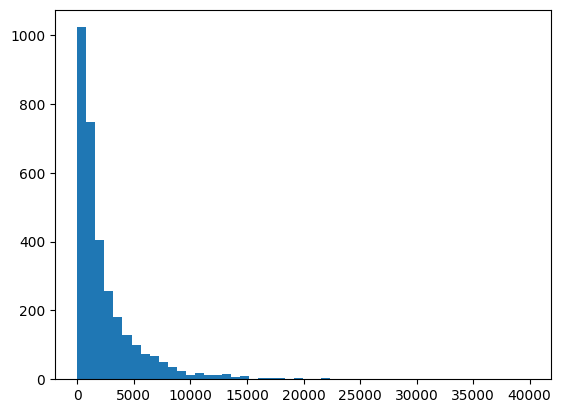

In [69]:
plt.hist(combined, bins = 50)

(array([149., 101., 145., 190., 220., 246., 234., 194., 210., 196., 145.,
        148., 108., 101., 101.,  87.,  66.,  67.,  62.,  62.,  32.,  51.,
         48.,  25.,  36.,  26.,  23.,  20.,  21.,  20.,  25.,   5.,   9.,
         11.,   9.,   2.,   5.,   3.,   1.,   3.,   2.,   5.,   0.,   0.,
          0.,   0.,   1.,   0.,   0.,   1.]),
 array([0.00087346, 0.00843412, 0.01599478, 0.02355543, 0.03111609,
        0.03867674, 0.0462374 , 0.05379805, 0.06135871, 0.06891937,
        0.07648002, 0.08404068, 0.09160133, 0.09916199, 0.10672264,
        0.1142833 , 0.12184396, 0.12940461, 0.13696527, 0.14452592,
        0.15208658, 0.15964723, 0.16720789, 0.17476855, 0.1823292 ,
        0.18988986, 0.19745051, 0.20501117, 0.21257182, 0.22013248,
        0.22769314, 0.23525379, 0.24281445, 0.2503751 , 0.25793576,
        0.26549641, 0.27305707, 0.28061773, 0.28817838, 0.29573904,
        0.30329969, 0.31086035, 0.318421  , 0.32598166, 0.33354232,
        0.34110297, 0.34866363, 0.35622428, 0.

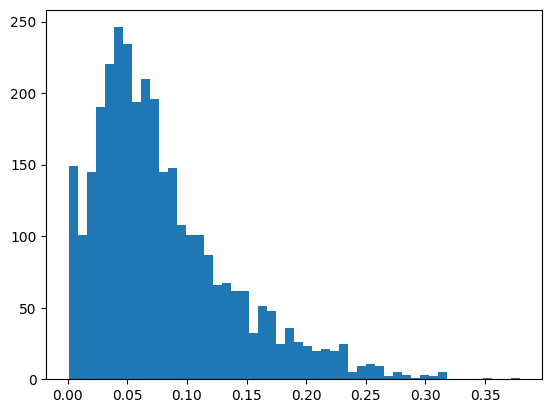

In [70]:
plt.hist(widths, bins=50)

(array([ 66.,  62.,  89., 136., 151., 172., 223., 268., 245., 258., 225.,
        220., 169., 152., 141., 118.,  79.,  66.,  59.,  42.,  29.,  26.,
         27.,  13.,  25.,  15.,  17.,  10.,  13.,   9.,  10.,   7.,   9.,
          9.,   9.,   5.,   7.,   6.,   7.,   2.,   5.,   5.,   4.,   3.,
          1.,   0.,   0.,   1.,   0.,   1.]),
 array([0.00276214, 0.02306839, 0.04337464, 0.0636809 , 0.08398715,
        0.10429341, 0.12459966, 0.14490592, 0.16521217, 0.18551843,
        0.20582468, 0.22613094, 0.24643719, 0.26674345, 0.2870497 ,
        0.30735596, 0.32766221, 0.34796847, 0.36827472, 0.38858097,
        0.40888723, 0.42919348, 0.44949974, 0.46980599, 0.49011225,
        0.5104185 , 0.53072476, 0.55103101, 0.57133727, 0.59164352,
        0.61194978, 0.63225603, 0.65256229, 0.67286854, 0.6931748 ,
        0.71348105, 0.7337873 , 0.75409356, 0.77439981, 0.79470607,
        0.81501232, 0.83531858, 0.85562483, 0.87593109, 0.89623734,
        0.9165436 , 0.93684985, 0.95715611, 0.

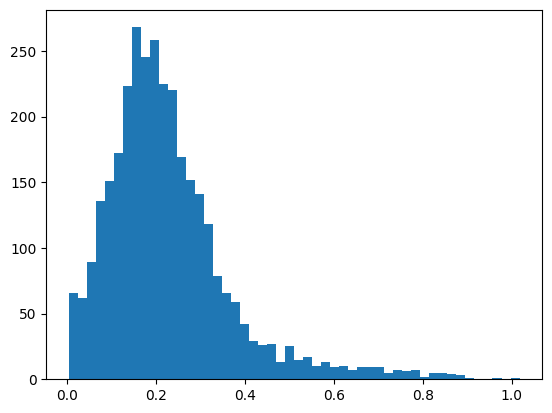

In [71]:
plt.hist(lengths, bins=50)

In [68]:
len([value for value in combined if value > np.quantile(combined, 0.25)])

2411

In [72]:
percentile_25 = [value for value in combined if value > np.quantile(combined, 0.25)]

(array([813., 486., 278., 180., 147., 102.,  87.,  60.,  64.,  34.,  29.,
         16.,  19.,  13.,   4.,  18.,  12.,   7.,   6.,   4.,   1.,   3.,
          5.,   2.,   5.,   1.,   2.,   2.,   1.,   1.,   1.,   2.,   0.,
          1.,   0.,   1.,   0.,   0.,   0.,   1.,   0.,   1.,   0.,   0.,
          1.,   0.,   0.,   0.,   0.,   1.]),
 array([  625.5 ,  1410.65,  2195.8 ,  2980.95,  3766.1 ,  4551.25,
         5336.4 ,  6121.55,  6906.7 ,  7691.85,  8477.  ,  9262.15,
        10047.3 , 10832.45, 11617.6 , 12402.75, 13187.9 , 13973.05,
        14758.2 , 15543.35, 16328.5 , 17113.65, 17898.8 , 18683.95,
        19469.1 , 20254.25, 21039.4 , 21824.55, 22609.7 , 23394.85,
        24180.  , 24965.15, 25750.3 , 26535.45, 27320.6 , 28105.75,
        28890.9 , 29676.05, 30461.2 , 31246.35, 32031.5 , 32816.65,
        33601.8 , 34386.95, 35172.1 , 35957.25, 36742.4 , 37527.55,
        38312.7 , 39097.85, 39883.  ]),
 <BarContainer object of 50 artists>)

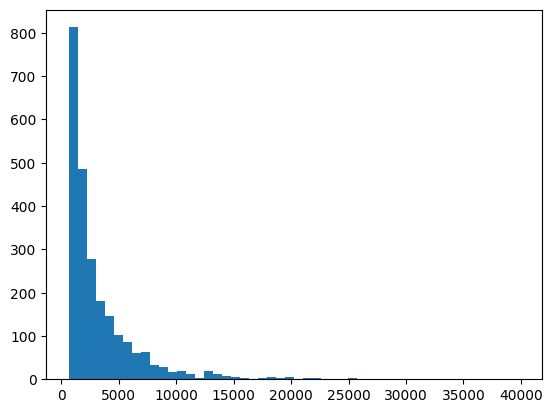

In [73]:
plt.hist(percentile_25, bins=50)

In [74]:
percentile_25_value = np.quantile(combined, 0.25)

In [78]:
filtered_train = train[train["box"].apply(lambda x: x is None or (x is not None and x["contour_area"] > percentile_25_value))]
filtered_val = val[val["box"].apply(lambda x: x is None or (x is not None and x["contour_area"] > percentile_25_value))]
filtered_test = test[test["box"].apply(lambda x: x is None or (x is not None and x["contour_area"] > percentile_25_value))]

In [79]:
filtered_train.to_json("./obb_annotations_stratified_split/annos_with_areas/25_percentile/obb_train_split_area_25_percentile.json", orient='records', indent=2, index=None)
filtered_val.to_json("./obb_annotations_stratified_split/annos_with_areas/25_percentile/obb_val_split_area_25_percentile.json", orient='records', indent=2, index=None)
filtered_test.to_json("./obb_annotations_stratified_split/annos_with_areas/25_percentile/obb_test_split_area_25_percentile.json", orient='records', indent=2, index=None)